In [1]:
# Multi linear Regession
# Assumptions
# Linearity
# Homoscedasticity
# Multivariate normality
# Independence of errors
# Lack of multicollinearity
# y = constant (b0) + b1X1 + b2X2 + b3X3 + ???
# In this model, our State is the dummy variable

# Building a model ( Backward Elimination)
# 1) select significance level to stay in the model (eg SL=0.005)
# 2) Fit the model wit all possible predictors
# 3) Consider the predictor with the highest P-value. If P > SL, go to Step 4, otherwise go to Fin
# 4) Remove the predictor
# 5) Fit models without this variable

# Building a model ( Forward Elimination)
# 1) select significance level to enter in the model (eg SL=0.005)
# 2) Fit all simple regression models y~xn Select the one with the lowest P-value
# 3) Keep this variable and fit all possible models with one extra predictor added to the ones you already have
# 4) Consider the predictor with the lowest P-value. If P < SL, go to Step three, otherwise go to Fin
# 5) Fit models without this variable

# Building a model ( Bidirectional Elimination)
# 1) select a significance level to enter or stay in the model (eg SLenter=0.05, SLstay=0.05)
# 2) Perform the next step of forward selection (new variables ,ust have: P < SLenter to enter)
# 3) Perform all steps of backward elimination (old variables ,ust have: P < SLstay to stay)
# 4) No new variable can enter and no old variable can exit

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Dependent and Independent variables

dataset = pd.read_csv('50_Startups.csv')
x = dataset.iloc[:, :-1].values # : means the range and -1 means less the last column
y = dataset.iloc[:,-1].values
# y = dataset['Profit'].values
# print(dataset)
# print(x)
# print(y)
# print(x.shape)
# print(y.shape)


In [3]:
# Check dataframe for missing values

# dataset.fillna(0, inplace=True) # This is to fill out 0 for all missing values

missing = dataset.isnull().sum()
print(missing)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [4]:
# Encoding the independent variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough') # Pass through will not encode the other columns. [3] represents index to encode
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [5]:
# Splitting data into Training and Test set
# To measure if the model is good enough, we can use a method called Train/Test.
# Train/Test is a method to measure the accuracy of your model.
# It is called Train/Test because you split the the data set into two sets: a training set and a testing set.
# 80% for training, and 20% for testing.
# You train the model using the training set.
# You test the model using the testing set.
# Train the model means create the model.
# Test the model means test the accuracy of the model.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print(x_train)
#print(x_test)
print(y_train)
#print(y_test)

[[1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 0.0 116983.8 45173.06]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 77044.01 99281.34 140574.81]
 [0.0 1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [1.0 0.0 0.0 22177.74 154806.14 28334.72]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.

In [6]:
# Trainig the multi Linear regresion model on the training set
# Dummy variable trap ???
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [7]:
# Predict the Test set results
# Here we are analysing the predicted vs the actual test data
# Our results show the predicted vs the real profits

y_pred = regressor.predict(x_test) # predicted profits using data from the test set
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)) # Just 1 column. 0 = vertical axis and 1 = horizontal axis


[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]


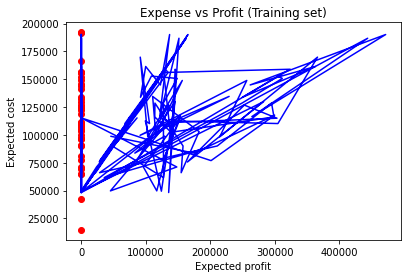

In [9]:
# Visualising training test results

plt.scatter(x_train[:,0],y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Expense vs Profit (Training set)')
plt.xlabel('Expected profit')
plt.ylabel('Expected cost')
plt.show() 

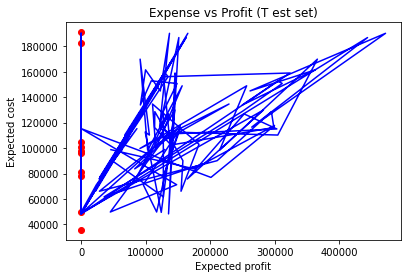

In [12]:
# Visualising training train results

plt.scatter(x_test[:,0],y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Expense vs Profit (T est set)')
plt.xlabel('Expected profit')
plt.ylabel('Expected cost')
plt.show()

In [ ]:

from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(x, y)
model.coef_ # The linear regression coefficient can be accessed in a form of class attribute with model.coef_
model.intercept_ # The y-intercept can be accessed in a form of class attribute with model.intercept_
model.score(x, y) # How good was your model? You can evaluate your model performance in a form of R-squared, with model.score(X, y). X is the features, and y is the response variable used to fit the model.
